# Import Libraries 

In [12]:
from tqdm import tqdm
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from   torchvision import datasets, transforms
import torch.optim as optim
from   torch.optim.lr_scheduler import StepLR
from   torchinfo import summary

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import models as cifar_models

# Set the GPU device

In [3]:
# Is GPU available
device = torch.device("cpu")
is_gpu_available = False

if torch.cuda.is_available():
    print("CUDA is available")
    device = torch.device("cuda:0")
    is_gpu_available = True
elif torch.backends.mps.is_available():
    print("Apple MPS is available")
    device = torch.device("mps:0")
    is_gpu_available = True

torch.set_default_device(device)

Apple MPS is available


# Download and prepare the dataset

In [6]:
# To get over the following error:
# URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
batch_size = 2048
# Train Phase transformations
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Test Phase transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Data
train_data = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data  = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

# Data loaders
dataloader_args = dict(shuffle=False, batch_size=batch_size, num_workers=4, pin_memory=True) if is_gpu_available else dict(shuffle=True, batch_size=64)

# train dataloader
train_data_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)
# test dataloader
test_data_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

print("classes: ", train_data.class_to_idx)
# {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
classes:  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


## Look at the data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


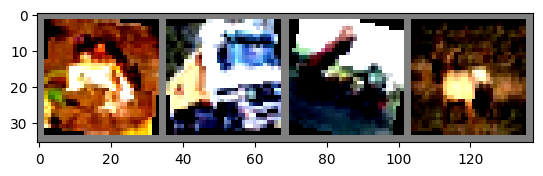

frog  truck truck deer 


In [11]:
# # functions to show an image
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

# # get some random training images
# dataiter = iter(train_data_loader)
# images, labels = next(dataiter)
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# # show images
# imshow(torchvision.utils.make_grid(images[:4]))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# Model

# Summary

In [4]:
model = cifar_models.Net().to(device)
summary(model=model, input_size=(1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
NetBNv2                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 32, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 32, 32, 32]           4,736
│    └─ReLU: 2-2                         [1, 32, 32, 32]           --
│    └─BatchNorm2d: 2-3                  [1, 32, 32, 32]           64
│    └─Dropout: 2-4                      [1, 32, 32, 32]           --
├─Sequential: 1-2                        [1, 32, 32, 32]           --
│    └─Conv2d: 2-5                       [1, 32, 32, 32]           9,248
│    └─ReLU: 2-6                         [1, 32, 32, 32]           --
│    └─BatchNorm2d: 2-7                  [1, 32, 32, 32]           64
│    └─Dropout: 2-8                      [1, 32, 32, 32]           --
├─Sequential: 1-3                        [1, 16, 32, 32]           --
│    └─Conv2d: 2-9                       [1, 16, 32, 32]           528
├─MaxPoo

# Train and test the model

In [ ]:
model = cifar_models.Net().to(device)

criterion = F.nll_loss
optimizer = optim.SGD(params=model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimiser, step_size=6, gamma=0.1)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 20
for epoch in range(EPOCHS):
    # print("EPOCH:", epoch)
    train(model, train_data_loader, criterion, optimizer, epoch, train_losses, train_acc, device)
    # scheduler.step()
    test(model, test_data_loader, epoch, test_losses, test_acc, device)